# Load finance data 


In [32]:
import pandas as pd

finance_df = pd.read_csv('finance_data/districts_ccd_finance.csv.zip')
print(finance_df.columns)
finance_df.head()

Index(['year', 'leaid', 'fips', 'censusid', 'rev_total', 'rev_fed_total',
       'rev_fed_child_nutrition_act', 'rev_fed_state_title_i',
       'rev_fed_state_idea', 'rev_fed_state_math_sci_teach',
       ...
       'debt_longterm_issued_FY', 'debt_longterm_retired_FY',
       'debt_longterm_outstand_end_FY', 'debt_shortterm_outstand_beg_FY',
       'debt_shortterm_outstand_end_FY', 'assets_sinking_fund',
       'assets_bond_fund', 'assets_other', 'enrollment_fall_responsible',
       'enrollment_fall_school'],
      dtype='object', length=133)


,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_issued_FY,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school
0,1991,100005,1.0,15048401.0,11265000.0,1012000.0,285000,413000,140000,10000,...,0.0,0,0.0,0,0.0,0,0.0,732000.0,3084.0,NaN
1,1991,100006,1.0,15048001.0,22855000.0,2009000.0,854000,671000,249000,18000,...,0.0,2000,12385000.0,0,0.0,370000,1679000.0,511000.0,6139.0,NaN
2,1991,100007,1.0,15037401.0,36812000.0,651000.0,179000,99000,286000,6000,...,44159000.0,260000,53960000.0,0,0.0,0,30420000.0,3816000.0,6328.0,NaN
3,1991,100030,1.0,15062002.0,14397000.0,1014000.0,279000,447000,136000,12000,...,5353000.0,192000,6449000.0,0,0.0,0,2005000.0,2619000.0,3783.0,NaN
4,1991,100060,1.0,15020001.0,7768000.0,948000.0,247000,295000,295000,8000,...,0.0,0,0.0,0,0.0,0,0.0,144000.0,2154.0,NaN


In [37]:
# We only want 2009-2017
finance_df = finance_df[finance_df["year"] > 2008]
finance_df.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [39]:
# Adding State column by reading codebook
value_mappings = pd.read_excel(open('finance_data/codebook_districts_ccd_finance.xls', 'rb'),
              sheet_name='values')

fips_codes = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
finance_df["state_name"] = finance_df["fips"].map(fips_codes)
print(finance_df.columns)
finance_df.head()

Index(['year', 'leaid', 'fips', 'censusid', 'rev_total', 'rev_fed_total',
       'rev_fed_child_nutrition_act', 'rev_fed_state_title_i',
       'rev_fed_state_idea', 'rev_fed_state_math_sci_teach',
       ...
       'debt_longterm_retired_FY', 'debt_longterm_outstand_end_FY',
       'debt_shortterm_outstand_beg_FY', 'debt_shortterm_outstand_end_FY',
       'assets_sinking_fund', 'assets_bond_fund', 'assets_other',
       'enrollment_fall_responsible', 'enrollment_fall_school', 'state_name'],
      dtype='object', length=134)


,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school,state_name
258542,2009,0100002,1.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0,Alabama
258543,2009,0100005,1.0,1.504840e+12,38927000.0,6477000.0,1371000,2060000,1282000,184000,...,261000,31401000.0,0,0.0,0,7237000.0,3052000.0,4104.0,4104.0,Alabama
258544,2009,0100006,1.0,1.504800e+12,57766000.0,11705000.0,2389000,4483000,1926000,466000,...,1662000,20448000.0,0,0.0,825000,934000.0,3098000.0,5777.0,5777.0,Alabama
258545,2009,0100007,1.0,1.503740e+12,149924000.0,9191000.0,1557000,863000,3055000,203000,...,121976000,297009000.0,0,0.0,60091000,1713000.0,67018000.0,12889.0,12889.0,Alabama
258546,2009,0100008,1.0,1.504530e+12,85030000.0,6893000.0,949000,698000,2420000,142000,...,1582000,68608000.0,0,0.0,0,29298000.0,12231000.0,8654.0,8654.0,Alabama


In [40]:
#  Graph 1: What is each states’ instructional spend (y variable) from 2009-2017(x variable)?
fips_region = value_mappings[value_mappings["format"] == "fips"].set_index('code').region.to_dict()
finance_df["region"] = finance_df["fips"].map(fips_region)
print(finance_df.columns)
finance_df.head()

Index(['year', 'leaid', 'fips', 'censusid', 'rev_total', 'rev_fed_total',
       'rev_fed_child_nutrition_act', 'rev_fed_state_title_i',
       'rev_fed_state_idea', 'rev_fed_state_math_sci_teach',
       ...
       'debt_longterm_outstand_end_FY', 'debt_shortterm_outstand_beg_FY',
       'debt_shortterm_outstand_end_FY', 'assets_sinking_fund',
       'assets_bond_fund', 'assets_other', 'enrollment_fall_responsible',
       'enrollment_fall_school', 'state_name', 'region'],
      dtype='object', length=135)


,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school,state_name,region
258542,2009,0100002,1.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0,Alabama,West
258543,2009,0100005,1.0,1.504840e+12,38927000.0,6477000.0,1371000,2060000,1282000,184000,...,31401000.0,0,0.0,0,7237000.0,3052000.0,4104.0,4104.0,Alabama,West
258544,2009,0100006,1.0,1.504800e+12,57766000.0,11705000.0,2389000,4483000,1926000,466000,...,20448000.0,0,0.0,825000,934000.0,3098000.0,5777.0,5777.0,Alabama,West
258545,2009,0100007,1.0,1.503740e+12,149924000.0,9191000.0,1557000,863000,3055000,203000,...,297009000.0,0,0.0,60091000,1713000.0,67018000.0,12889.0,12889.0,Alabama,West
258546,2009,0100008,1.0,1.504530e+12,85030000.0,6893000.0,949000,698000,2420000,142000,...,68608000.0,0,0.0,0,29298000.0,12231000.0,8654.0,8654.0,Alabama,West


In [41]:
# Only show that we want
finance_filtered = finance_df[['year', 'leaid', 'fips', 'censusid', 'rev_total', 'enrollment_fall_responsible', 'enrollment_fall_school', 'state_name', 'region', 'exp_total', 'exp_current_instruction_total']]
finance_filtered

,year,leaid,fips,censusid,rev_total,enrollment_fall_responsible,enrollment_fall_school,state_name,region,exp_total,exp_current_instruction_total
258542,2009,0100002,1.0,-2.000000e+00,-2.0,0.0,0.0,Alabama,West,-2.0,-2.0
258543,2009,0100005,1.0,1.504840e+12,38927000.0,4104.0,4104.0,Alabama,West,57286000.0,20908000.0
258544,2009,0100006,1.0,1.504800e+12,57766000.0,5777.0,5777.0,Alabama,West,57101000.0,29908000.0
258545,2009,0100007,1.0,1.503740e+12,149924000.0,12889.0,12889.0,Alabama,West,152411000.0,83430000.0
258546,2009,0100008,1.0,1.504530e+12,85030000.0,8654.0,8654.0,Alabama,West,85734000.0,44662000.0
...,...,...,...,...,...,...,...,...,...,...,...
406617,2016,5680250,56.0,5.150204e+13,-2.0,-2.0,0.0,Wyoming,NaN,-2.0,-2.0
406618,2016,5680251,56.0,-2.000000e+00,-2.0,0.0,0.0,Wyoming,NaN,-2.0,-2.0
406619,2016,5680252,56.0,-2.000000e+00,-2.0,0.0,0.0,Wyoming,NaN,-2.0,-2.0
406620,2016,5680253,56.0,-2.000000e+00,-2.0,0.0,0.0,Wyoming,NaN,-2.0,-2.0


In [ ]:
# Create line a chart or clean the data first

In [27]:
# Line chart
# x? time
# y? exp_current_instruction_total

# Group by Region 
finance_region_df = finance_filtered.groupby(["region", "year"])["exp_current_instruction_total"].sum().reset_index(name = "total")

finance_region_df

,region,year,total
0,North,1991,4.351016e+10
1,North,1994,5.291516e+10
2,North,1995,5.513498e+10
3,North,1996,5.735421e+10
4,North,1997,6.057181e+10
...,...,...,...
67,West,2012,1.801757e+11
68,West,2013,1.868146e+11
69,West,2014,1.950837e+11
70,West,2015,2.021983e+11


<AxesSubplot:xlabel='year', ylabel='total'>

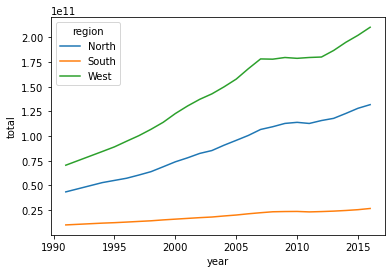

In [31]:
# Create the Line graph!!!
import seaborn as sns
import matplotlib as plt
sns.lineplot(data=finance_region_df, x='year', y='total', hue='region')
